In [24]:
# Librerías
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
# Import dataset
file_path = "../data/breast-cancer-wisconsin.data.csv"
df_breast_cancer = pd.read_csv(file_path)
df_breast_cancer


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# See data
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# All data in the "Unnamed: 32" column is null, remove the column.
# Also remove the id column, it won't give much information about the target.
df_breast_cancer = df_breast_cancer.drop(['id','Unnamed: 32'], axis=1)

In [5]:
# Diagnosis is the target value, its value is either 'B' or 'M'
# B is benign
# M is malignant

# Separate independent and target values
X = df_breast_cancer.drop('diagnosis', axis=1)
y = df_breast_cancer['diagnosis']

In [6]:
# Normalize independent variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [8]:
y = LabelEncoder().fit_transform(y)

In [9]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [10]:
# Split test-train data

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, random_state=42, test_size=0.3, shuffle=True
)

In [11]:
# Train with linear regression
linear_regression_model = LogisticRegression()
linear_regression_model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Predict with trained model.
y_pred = linear_regression_model.predict(X_test)

In [13]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9688


In [14]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9841


In [15]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion_matrix}")

Confusion matrix:
[[106   2]
 [  1  62]]


In [16]:
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.4f}")

F1 score: 0.9764


AUC: 0.9981


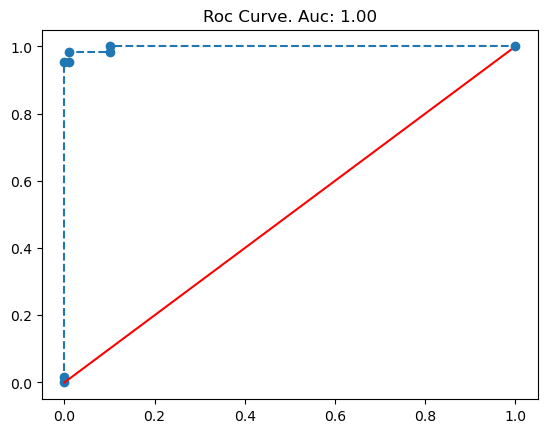

In [17]:
y_probs = linear_regression_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_probs[:,1])
plt.plot(fpr, tpr, marker="o", linestyle="--")
# Draw straight line
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]

# Calcular auc
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print(f"AUC: {auc:.4f}")

# Show ROC curve
plt.title(f"Roc Curve. Auc: {auc:.2f}")
plt.plot(x,y, color="r")
plt.savefig("rocCurve.png")
plt.show()

In [25]:
# Test model

# Confusion Matrix
# Precision
# Recall
# F1-Score
# ROC

def test_model(y_test, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix:\n{cm}")
    display = ConfusionMatrixDisplay(cm)
    display.plot().figure_.savefig("confusionMatrix.png")
    display.plot()

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")

    # Recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall:.4f}")

    # F1-Score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 score: {f1:.4f}")

    # ROC curve and AUC
    y_probs = linear_regression_model.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_probs[:,1])
    plt.cla()
    plt.plot(fpr, tpr, marker="o", linestyle="--")
    # Draw straight line
    x = [i*0.01 for i in range(100)]
    y = [i*0.01 for i in range(100)]

    # Calcular auc
    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print(f"AUC: {auc:.4f}")

    # Show ROC curve
    plt.title(f"Roc Curve. Auc: {auc:.4f}")
    plt.plot(x,y, color="r")
    plt.savefig("rocCurve.png")


Confusion matrix:
[[106   2]
 [  1  62]]
Precision: 0.9688
Recall: 0.9841
F1 score: 0.9764
AUC: 0.9981


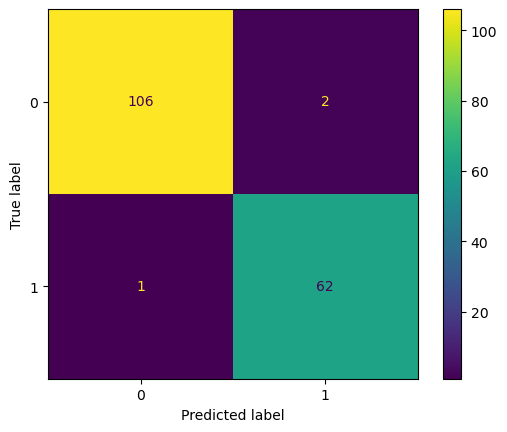

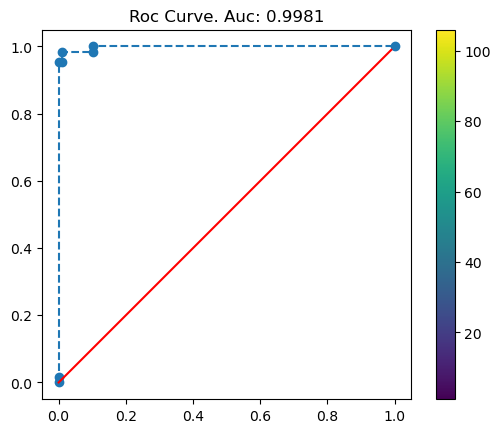

In [26]:
# Test model
test_model(y_test, y_pred)